In [1]:
import torch
import os
import pandas as pd
import cv2
import torchvision
from torchvision import transforms
from torchvision.transforms import v2
from torch.utils.data import Dataset
from torchvision.utils import save_image

In [2]:
dirname = 'CAT_00'
base_path = '/data/etc/molo/%s' % dirname
file_list =  sorted(os.listdir(base_path))

In [3]:
file_list[0:10]

['.ipynb_checkpoints',
 '00000001_000.jpg',
 '00000001_000.jpg.cat',
 '00000001_005.jpg',
 '00000001_005.jpg.cat',
 '00000001_008.jpg',
 '00000001_008.jpg.cat',
 '00000001_011.jpg',
 '00000001_011.jpg.cat',
 '00000001_012.jpg']

In [5]:
img_name = os.path.join(base_path, file_list[5])
annotation_name = img_name + '.cat'

In [8]:
annotation_name

'/data/etc/molo/CAT_00/00000001_008.jpg.cat'

In [9]:
image = cv2.imread(img_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load annotations and compute the bounding box
frame = pd.read_csv(annotation_name, sep =' ', header=None)
landmark = (frame.to_numpy()[0][1:-1]).reshape((-1, 2))
top_left = landmark[4]
top_right = landmark[7]
width = int(top_right[0] - top_left[0])
height = width
margin = int(width * 0.25)
x = int(top_left[0]) - margin
y = int(top_left[1]) - margin

# Crop the image to the bounding box
x_start = max(0, x)
y_start = max(0, y)
x_end = min(x + width + 2 * margin, image.shape[1])
y_end = min(y + height + 2 * margin, image.shape[0])


In [10]:
crop_img = image[y_start:y_end, x_start:x_end]

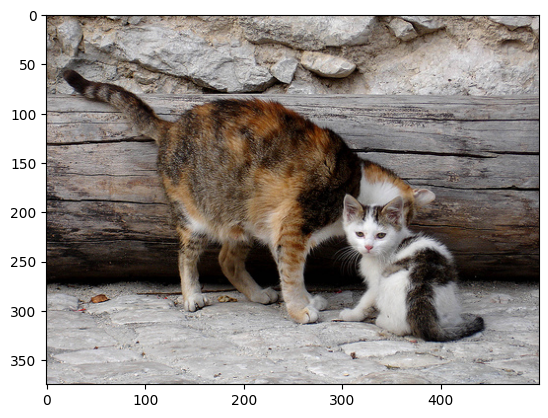

In [12]:
import cv2
import matplotlib.pyplot as plt

plt.imshow(image)

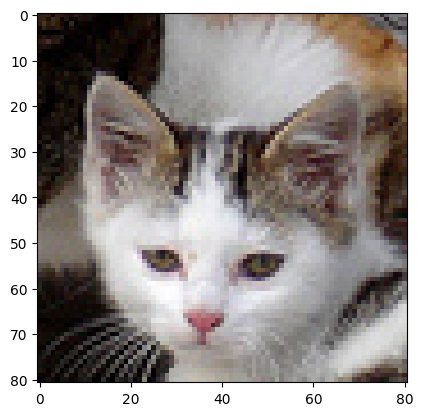

In [13]:
plt.imshow(crop_img)

In [14]:
def get_transform():
    return v2.Compose([
        v2.ToImage(),
        v2.RandomHorizontalFlip(p=0.5),
        #v2.RandomRotation(degrees=(0,10)),
        v2.Resize(256),
        v2.ToDtype(torch.float32, scale=True)
    ])

In [15]:
transform_flip = get_transform()
transformed_crop_img = transform_flip(crop_img)

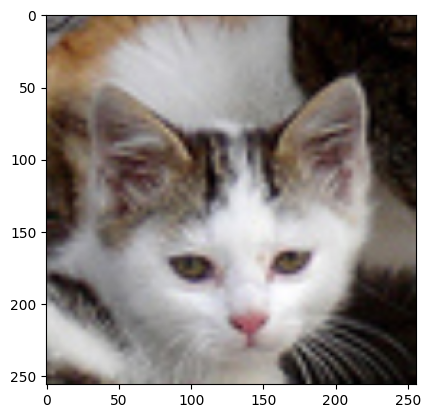

In [17]:
from torchvision.transforms.functional import to_pil_image
transformed_pil_img = to_pil_image(transformed_crop_img)
plt.imshow(transformed_pil_img)

In [25]:
def get_rotate():
    return v2.Compose([
        v2.ToImage(),
        v2.RandomHorizontalFlip(p=0.5),
        v2.RandomRotation(degrees=(0,45)),
        v2.Resize(256),
        v2.ToDtype(torch.float32, scale=True)
    ])

In [26]:
transform_rotate = get_rotate()
rotated_crop_img = transform_rotate(crop_img)

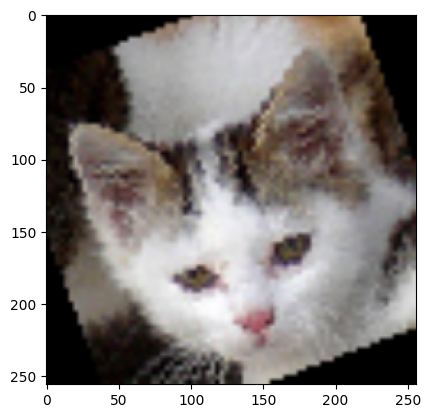

In [27]:
rotated_pil_img = to_pil_image(rotated_crop_img)
plt.imshow(rotated_pil_img)

In [29]:
rotated_pil_img.save('test.png')